# Soccer Data Analysis with Jupyter notebook showing the best value for soccer players based on the difference between their value and their wages.

In [29]:
import pandas as pd

In [13]:
data_frame = pd.read_csv("data.csv")
data_frame.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96,33,28,26,6,11,15,14,8,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95,28,31,23,7,11,15,14,11,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94,27,24,33,9,9,15,15,11,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68,15,21,13,90,85,87,88,94,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88,68,58,51,15,13,5,10,13,€196.4M


In [14]:
# Convert value to numeric
def convert_value_to_numeric(value):
    value = value.replace('€', '')
    if 'M' in value:
        value = value.replace('M', '')
        value = float(value) * 1000000
    elif 'K' in value:
        value = value.replace('K', '')
        value = float(value) * 1000
    return float(value)


df1 = data_frame[["Name", "Value", "Wage"]].copy()

df1["Value"] = df1["Value"].apply(convert_value_to_numeric)
df1["Wage"] = df1["Wage"].apply(convert_value_to_numeric)

df1.loc[:, 'Difference'] = df1['Value'] - df1['Wage']

# Set to display format for float numbers with commas
pd.options.display.float_format = '{:,.0f}'.format

df1.sort_values(by="Difference", ascending=False)

,Name,Value,Wage,Difference
2,Neymar Jr,"118,500,000","290,000","118,210,000"
0,L. Messi,"110,500,000","565,000","109,935,000"
4,K. De Bruyne,"102,000,000","355,000","101,645,000"
5,E. Hazard,"93,000,000","340,000","92,660,000"
15,P. Dybala,"89,000,000","205,000","88,795,000"
...,...,...,...,...
17752,S. Phillips,0,"1,000","-1,000"
12192,H. Sulaimani,0,"3,000","-3,000"
3550,S. Nakamura,0,"4,000","-4,000"
4228,B. Nivet,0,"5,000","-5,000"


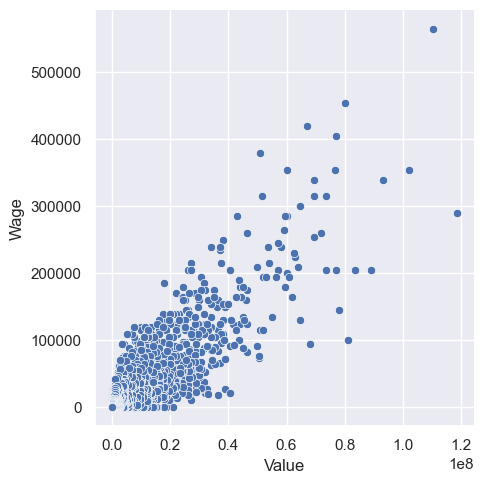

In [15]:
import seaborn as sns

sns.set_theme()
sns.relplot(x="Value", y="Wage", data=df1)

In [33]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, Legend

TOOLTIPS = HoverTool(tooltips=[
    ("index", "$index"),
    ("(Wage,Value)", "(@Wage, @Value)"),
    ("Name", "@Name"),
])

# Add the HoverTool to the plot
p = figure(title="Soccer 2023", x_axis_label="Value", y_axis_label="Wage", width=1300, height=700, tools=[TOOLTIPS])

# Add the circle glyph and specify the legend label
circle = p.circle("Wage", "Value", size=10, source=df1, legend_label="Best Value")

# Create the legend and add it to the plot
legend = Legend(items=[("Best Value", [circle])], location="top_left")
p.add_layout(legend, "right")

# Set legend properties
legend.label_text_font = "times"
legend.label_text_font_style = "italic"
legend.label_text_color = "navy"
legend.border_line_width = 3
legend.border_line_color = "navy"
legend.background_fill_color = "navy"
legend.background_fill_alpha = 0.2

# Show the plot
show(p)